<a href="https://colab.research.google.com/github/JamesUMD/Kaggle/blob/main/Cooking/Cooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import of Libraries

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from collections import  Counter
import gensim
import string
import re
from tqdm import tqdm

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Nueral Networks
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout
from keras.initializers import Constant
from sklearn.model_selection import train_test_split

#NLP
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
#import of Data
train = pd.read_json('https://raw.githubusercontent.com/JamesUMD/Kaggle/main/Cooking/train.json')
test = pd.read_json('https://raw.githubusercontent.com/JamesUMD/Kaggle/main/Cooking/test.json')
train.info()
test.info()

print(train.head(10))
print(test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9944 non-null   int64 
 1   ingredients  9944 non-null   object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB
      id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian

In [19]:
# How many ingredients in a dish
print('Maximum Number of Ingredients in a Dish: ',train['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train['ingredients'].str.len().min())

#Seperate ingredients
train['seperated_ingredients'] = train['ingredients'].apply(','.join)
test['seperated_ingredients'] = test['ingredients'].apply(','.join)

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


In [22]:
# Null Values

print('Train Columns with null values:\n', train.isnull().sum())
print('Test Columns with null values:\n', test.isnull().sum())

Train Columns with null values:
 id                       0
cuisine                  0
ingredients              0
seperated_ingredients    0
dtype: int64
Test Columns with null values:
 id                       0
ingredients              0
seperated_ingredients    0
dtype: int64


Text(0, 0.5, 'cuisine')

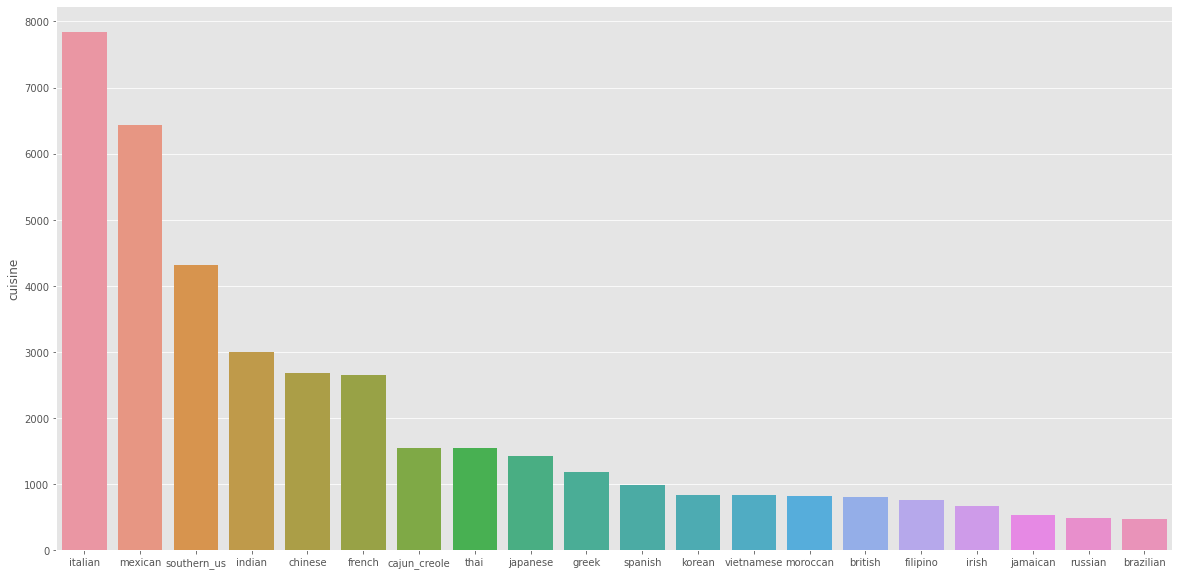

In [17]:
#Class distribution

dis = train.cuisine.value_counts()
sns.barplot(dis.index, dis)
plt.gcf().set_size_inches(20, 10)
plt.gca().set_ylabel('cuisine')

In [23]:
train['target_mean'] = train.groupby('seperated_ingredients')['cuisine'].mean()

fig = plt.figure(figsize=(8, 72), dpi=100)

sns.countplot(y=train.sort_values(by='target_mean', ascending=False)['seperated_ingredients'],
              hue=train.sort_values(by='target_mean', ascending=False)['cuisine'])

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.legend(loc=1)
plt.title('Target Distribution in Keywords')

plt.show()

train.drop(columns=['target_mean'], inplace=True)

DataError: ignored